In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
#https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data
df = pd.read_csv('data.csv')
df.head(3)

In [ ]:
import math
df_rel = df[['Life expectancy ', 'GDP']]
data = df_rel.to_dict()
l = len(list(data['GDP'].values()))
for k in data:
    data[k] = list(data[k].values())
final_data = [(data['GDP'][i],data['Life expectancy '][i]) for i in range(l)]
data = final_data
data = [(x,y) for x,y in data if not math.isnan(x) and not math.isnan(y)]
print(len(data))
data[:4]

First, we'll do some basic statistics on this dataset to get an understanding for what we're working with.

In [ ]:
gdps = [x[0] for x in data]
les = [x[1] for x in data]
min_gdp = min(gdps)
max_gdp = max(gdps)
min_le = min(les)
max_le = max(les)
avg_gdp = sum(gdps)/len(gdps)
avg_le = sum(les)/len(les)
print(f'Basic Statistics\n- [GDP] min: {min_gdp}; max: {max_gdp}; avg: {avg_gdp}')
print(f'- [LE] min: {min_le}; max: {max_le}; avg: {avg_le}')

In [ ]:
from plot import Plot
p = Plot()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp]),label='above both averages',
                    scatterArgs={'s':1.5,'color':'g'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp]),label='above average LE',
                    scatterArgs={'s':1.5,'color':'y'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp]),label='above average gdp',
                    scatterArgs={'s':1.5,'color':'b'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp]),label='below both averages',
                    scatterArgs={'s':0.25,'color':'r'},
                    wait=True,
                    chart={'title':'life expectancy (country) vs. GDP, 2000-2015',
                           'xlabel':'GDP ($)',
                           'ylabel':'Life Expectancy (years)'})
plt.plot([1000,70000],[avg_le,avg_le],label='average LE',color='black')
plt.plot([avg_gdp,avg_gdp],[55,84.5],label='average GDP',color='teal')
plt.plot([])
plt.legend()
p._showPlt()

In [ ]:
#todo: knn, other clustering

## Benchmarking `numpy` Functions
- let's benchmark some fundamental `np.linalg` matrix and vector functions to get an understanding of the implementation speed
- we will connect this to the theoretical time complexity of these operations

In [ ]:
import numpy as np
from numpy.linalg import svd
import time
from plot import Plot

from tqdm import tqdm
p = Plot()
rng = np.random.default_rng()
m = rng.random((5,5))
sizes = [2 * (2**k) for k in range(3,10)]
mtxs = [rng.random((s,s)) for s in sizes]
times = []
for m in tqdm(mtxs):
    t = time.time()
    svd(m)
    total_t = time.time() - t
    times.append(total_t)

In [ ]:
import math
import random
chart = {
            'xlabel': f'Dimension of matrix',
            'ylabel': f'Time',
            'title': f'Size vs. Time for SVD for Square Matrix',
            'lobf':1
        }
p.plotGeneric(data=(sizes,times),chart=chart,wait=True,label='time')
p._legend()
p.plotGeneric(data=(sizes,[2.5* (s**3)/10**9 for s in sizes]),label='O(n^3)',wait=1)
p._showPlt(legend=1)

In [ ]:
print(sizes)
print(times)

Above is the previous method for benchmarking. Below we'll demonstrate the new method, using the `Plot` class

In [ ]:
import numpy as np
from plot import Plot
P = Plot()
dims = 1
P.benchmark_np(np.mean,
               type_='sqmtx',
               gen_info={'range':(2,14),'dims':dims},
               theory_info={'f':lambda x:2*x**dims,
               'label':f'O(n^{dims})'}
               )

In [ ]:
import numpy as np
from plot import Plot
P = Plot()
dims = 1
P.benchmark_np(np.linalg.norm,
               type_='vec',
               gen_info={'range':(2,19),'dims':dims,'rand':'uniform'},
               theory_info={'f':lambda x:x**dims,
               'label':f'O(n^{dims})'}
               )

100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

len sizes 11
gen info {'range': (2, 11), 'op': 'mult', 'delta': 2, 'rand': 'base', 'dims': 2, 'type': 'mtx', 'base': (2, 2)}
12.0

Best Fit Curve: y =  825.82 x^3 + -4514.44 x^2 + 4061.41 x^1 + 24.927933923820174

[Sizes, dimension of data] first two:  2,4, ... last one: 2048
[Times, sec.             ] first two:  9.870529174804688e-05,7.891654968261719e-05, ... last one: 4.493445873260498
[9.870529174804688e-05, 7.891654968261719e-05, 3.3855438232421875e-05, 5.602836608886719e-05, 0.00015997886657714844, 0.009527921676635742, 0.0038301944732666016, 0.0850830078125, 0.12134289741516113, 0.574105978012085, 4.493445873260498]
[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


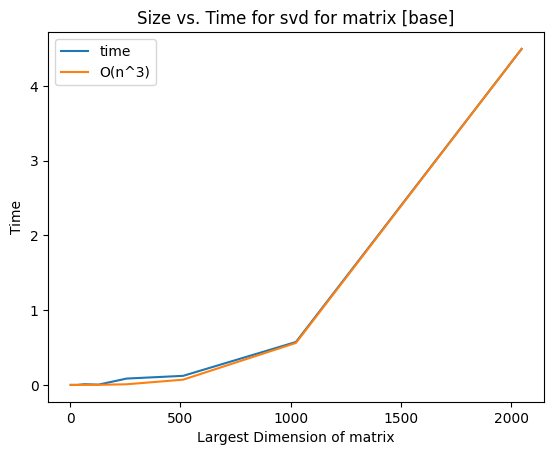

In [1]:
import numpy as np
from plot import Plot
P = Plot()
dims = 2
theory_times,sizes = P.benchmark_np(np.linalg.svd,
               type_='sqmtx',
               gen_info={'range':(2,11),'dims':dims,'rand':'base'},
               theory_info={
               'f':lambda x:(x**3)/(1.8*10**10), #18 * 10^9
               'prediction':3,
               'label':f'O(n^{3})'}
               )

# print(sizes)
# print('\n'*4)
# polyfit = np.polyfit([t * 10**9 for t in theory_times],sizes,1)
# dims = len(polyfit)-1
# fit_str = ' + '.join([f'{polyfit[i]:.2f} x^{dims-i}' for i in range(dims)])
# print('Best Fit for Theory Sizes: y = ',fit_str + ' + ' + str(polyfit[-1])) 

In [2]:
times = [9.870529174804688e-05, 7.891654968261719e-05, 3.3855438232421875e-05, 5.602836608886719e-05, 0.00015997886657714844, 0.009527921676635742, 0.0038301944732666016, 0.0850830078125, 0.12134289741516113, 0.574105978012085, 4.493445873260498]


In [7]:
theory_times = [(2**i)**3/18 for i in range(2,2+len(times))]
diffs = [theory_times[i]/times[i]/10**9 for i in range(len(times))]
print("Normalized Theoretical Times")
print([t/diffs[-1]/10**9 for t in theory_times])
print("Measured Times")
print(times)

Normalized Theoretical Times
[4.184847579580264e-09, 3.3478780636642114e-08, 2.678302450931369e-07, 2.1426419607450953e-06, 1.7141135685960762e-05, 0.0001371290854876861, 0.0010970326839014888, 0.00877626147121191, 0.07021009176969528, 0.5616807341575623, 4.493445873260498]
Measured Times
[9.870529174804688e-05, 7.891654968261719e-05, 3.3855438232421875e-05, 5.602836608886719e-05, 0.00015997886657714844, 0.009527921676635742, 0.0038301944732666016, 0.0850830078125, 0.12134289741516113, 0.574105978012085, 4.493445873260498]


In [ ]:
1073741824/10**9

In [ ]:
# can use np.linspace...

In [ ]:
delta = 2
times = []
sum([times[i+1]/times[i] for i in range(len(times)-1)])/(len(times)-1)/delta